In [35]:
# import libraries
import pandas as pd
import numpy as np
import os
from pandas_datareader import data as pdr
import datetime
import warnings
import yfinance as yf
import warnings
import matplotlib.pyplot as plt
import functools as ft
import operator
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chisquare
from scipy.stats import kstest
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
#import datetime
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

In [5]:
os.chdir("/Users/vinodhkumar/Downloads/cs513project")
warnings.filterwarnings("ignore")
yf.pdr_override()
start = "2010-12-01" 
end = "2020-12-01"

In [6]:
#getting all the necessary data
#different stock exchanges 

#predicting SPDATA finally
SPData = pdr.get_data_yahoo("^GSPC",start,end) #SP500
FTSE = pdr.get_data_yahoo("^FTSE",start,end)   #
NIKKEI = pdr.get_data_yahoo("^N225",start,end)
DJI = pdr.get_data_yahoo("^DJI",start,end)
NASDAQ = pdr.get_data_yahoo("^IXIC",start,end)
CAC = pdr.get_data_yahoo("^FCHI",start,end)  #french stock market

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
# renaming every stock venture to its name

SPData.rename(columns = {'Close':'SP_Close'},inplace=True)
FTSE.rename(columns = {'Close':'FTSE_Close'},inplace=True)
NIKKEI.rename(columns = {'Close':'NIKKEI_Close'},inplace=True)
DJI.rename(columns = {'Close':'DJI_Close'},inplace=True)
NASDAQ.rename(columns = {'Close':'NASDAQ_Close'},inplace=True)
CAC.rename(columns = {'Close':'CAC_Close'},inplace=True)

In [8]:
dfs = [SPData,FTSE,NIKKEI,DJI,NASDAQ,CAC]
for df in dfs:
    df.drop(axis=1,columns="Adj Close",inplace=True)

In [9]:
#List of data to be merged
Temp = [SPData,FTSE["FTSE_Close"],NIKKEI["NIKKEI_Close"],DJI["DJI_Close"],NASDAQ["NASDAQ_Close"],CAC["CAC_Close"]]
MergingList = [Temp[i].to_frame() for i in range(1,len(Temp))]
MergingList.insert(0,SPData)

In [10]:
Data = ft.reduce(lambda left,right: pd.merge(left,right,left_index=True,right_index=True),MergingList)

In [11]:
Data.dropna(inplace=True)
Data.shape

(2317, 10)

In [12]:
Data.describe()

Open         High          Low     SP_Close        Volume  \
count  2317.000000  2317.000000  2317.000000  2317.000000  2.317000e+03   
mean   2149.232226  2160.177919  2137.418788  2149.655606  3.771439e+09   
std     624.645112   627.521142   621.273021   624.446180  8.778359e+08   
min    1097.420044  1125.119995  1074.770020  1099.229980  1.025000e+09   
25%    1631.709961  1640.130005  1623.709961  1631.890015  3.261030e+09   
50%    2082.889893  2093.000000  2072.489990  2082.419922  3.612680e+09   
75%    2692.560059  2716.659912  2678.909912  2697.790039  4.083030e+09   
max    3638.550049  3645.989990  3629.330078  3638.350098  8.829380e+09   

        FTSE_Close  NIKKEI_Close     DJI_Close  NASDAQ_Close    CAC_Close  
count  2317.000000   2317.000000   2317.000000   2317.000000  2317.000000  
mean   6590.667928  16919.818566  19072.099585   5444.148389  4534.872297  
std     661.070898   4915.542940   5266.165246   2271.540446   755.308657  
min    4944.399902   8160.009766  10655.299805   2335.830078  2781.679932  
25%    6013.299805  13568.370117  14974.959961   3445.260010  4006.229980  
50%    6642.000000  17606.220703  17812.189453   4958.620117  4506.839844  
75%    7183.600098  21199.570312  24483.050781   7240.950195  5160.520020  
max    7877.500000  26644.710938  30046.240234  12205.849609  6111.240234

In [13]:
Data.isnull().sum()

Open            0
High            0
Low             0
SP_Close        0
Volume          0
FTSE_Close      0
NIKKEI_Close    0
DJI_Close       0
NASDAQ_Close    0
CAC_Close       0
dtype: int64

In [14]:
corr = Data.corr()
corr_mat = Data.corr().abs()
corr_mat

Open      High       Low  SP_Close    Volume  FTSE_Close  \
Open          1.000000  0.999798  0.999676  0.999503  0.078235    0.643155   
High          0.999798  1.000000  0.999534  0.999709  0.085887    0.637858   
Low           0.999676  0.999534  1.000000  0.999748  0.066590    0.649716   
SP_Close      0.999503  0.999709  0.999748  1.000000  0.075546    0.643684   
Volume        0.078235  0.085887  0.066590  0.075546  1.000000    0.351343   
FTSE_Close    0.643155  0.637858  0.649716  0.643684  0.351343    1.000000   
NIKKEI_Close  0.944385  0.943442  0.945013  0.943990  0.012169    0.742701   
DJI_Close     0.989913  0.989845  0.990424  0.990353  0.047954    0.684560   
NASDAQ_Close  0.983255  0.984356  0.982470  0.983655  0.147304    0.519235   
CAC_Close     0.882841  0.880335  0.885978  0.883073  0.106112    0.852740   

              NIKKEI_Close  DJI_Close  NASDAQ_Close  CAC_Close  
Open              0.944385   0.989913      0.983255   0.882841  
High              0.943442   0.989845      0.984356   0.880335  
Low               0.945013   0.990424      0.982470   0.885978  
SP_Close          0.943990   0.990353      0.983655   0.883073  
Volume            0.012169   0.047954      0.147304   0.106112  
FTSE_Close        0.742701   0.684560      0.519235   0.852740  
NIKKEI_Close      1.000000   0.932796      0.894924   0.939536  
DJI_Close         0.932796   1.000000      0.965794   0.889467  
NASDAQ_Close      0.894924   0.965794      1.000000   0.810173  
CAC_Close         0.939536   0.889467      0.810173   1.000000

[Text(0.5, 0, 'Open'),
 Text(1.5, 0, 'High'),
 Text(2.5, 0, 'Low'),
 Text(3.5, 0, 'SP_Close'),
 Text(4.5, 0, 'Volume'),
 Text(5.5, 0, 'FTSE_Close'),
 Text(6.5, 0, 'NIKKEI_Close'),
 Text(7.5, 0, 'DJI_Close'),
 Text(8.5, 0, 'NASDAQ_Close'),
 Text(9.5, 0, 'CAC_Close')]

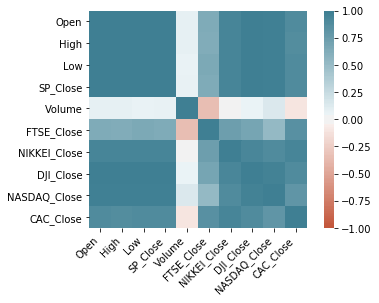

In [17]:
# Heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [18]:
Data.columns
len(Data.columns)

10

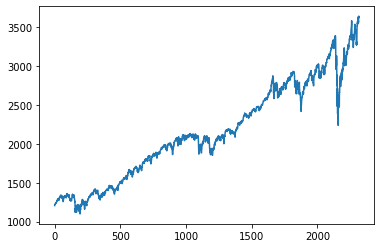

In [28]:
xaxis = np.arange(1,2318)
plt.plot(xaxis, np.array(Data['SP_Close']))
plt.show()

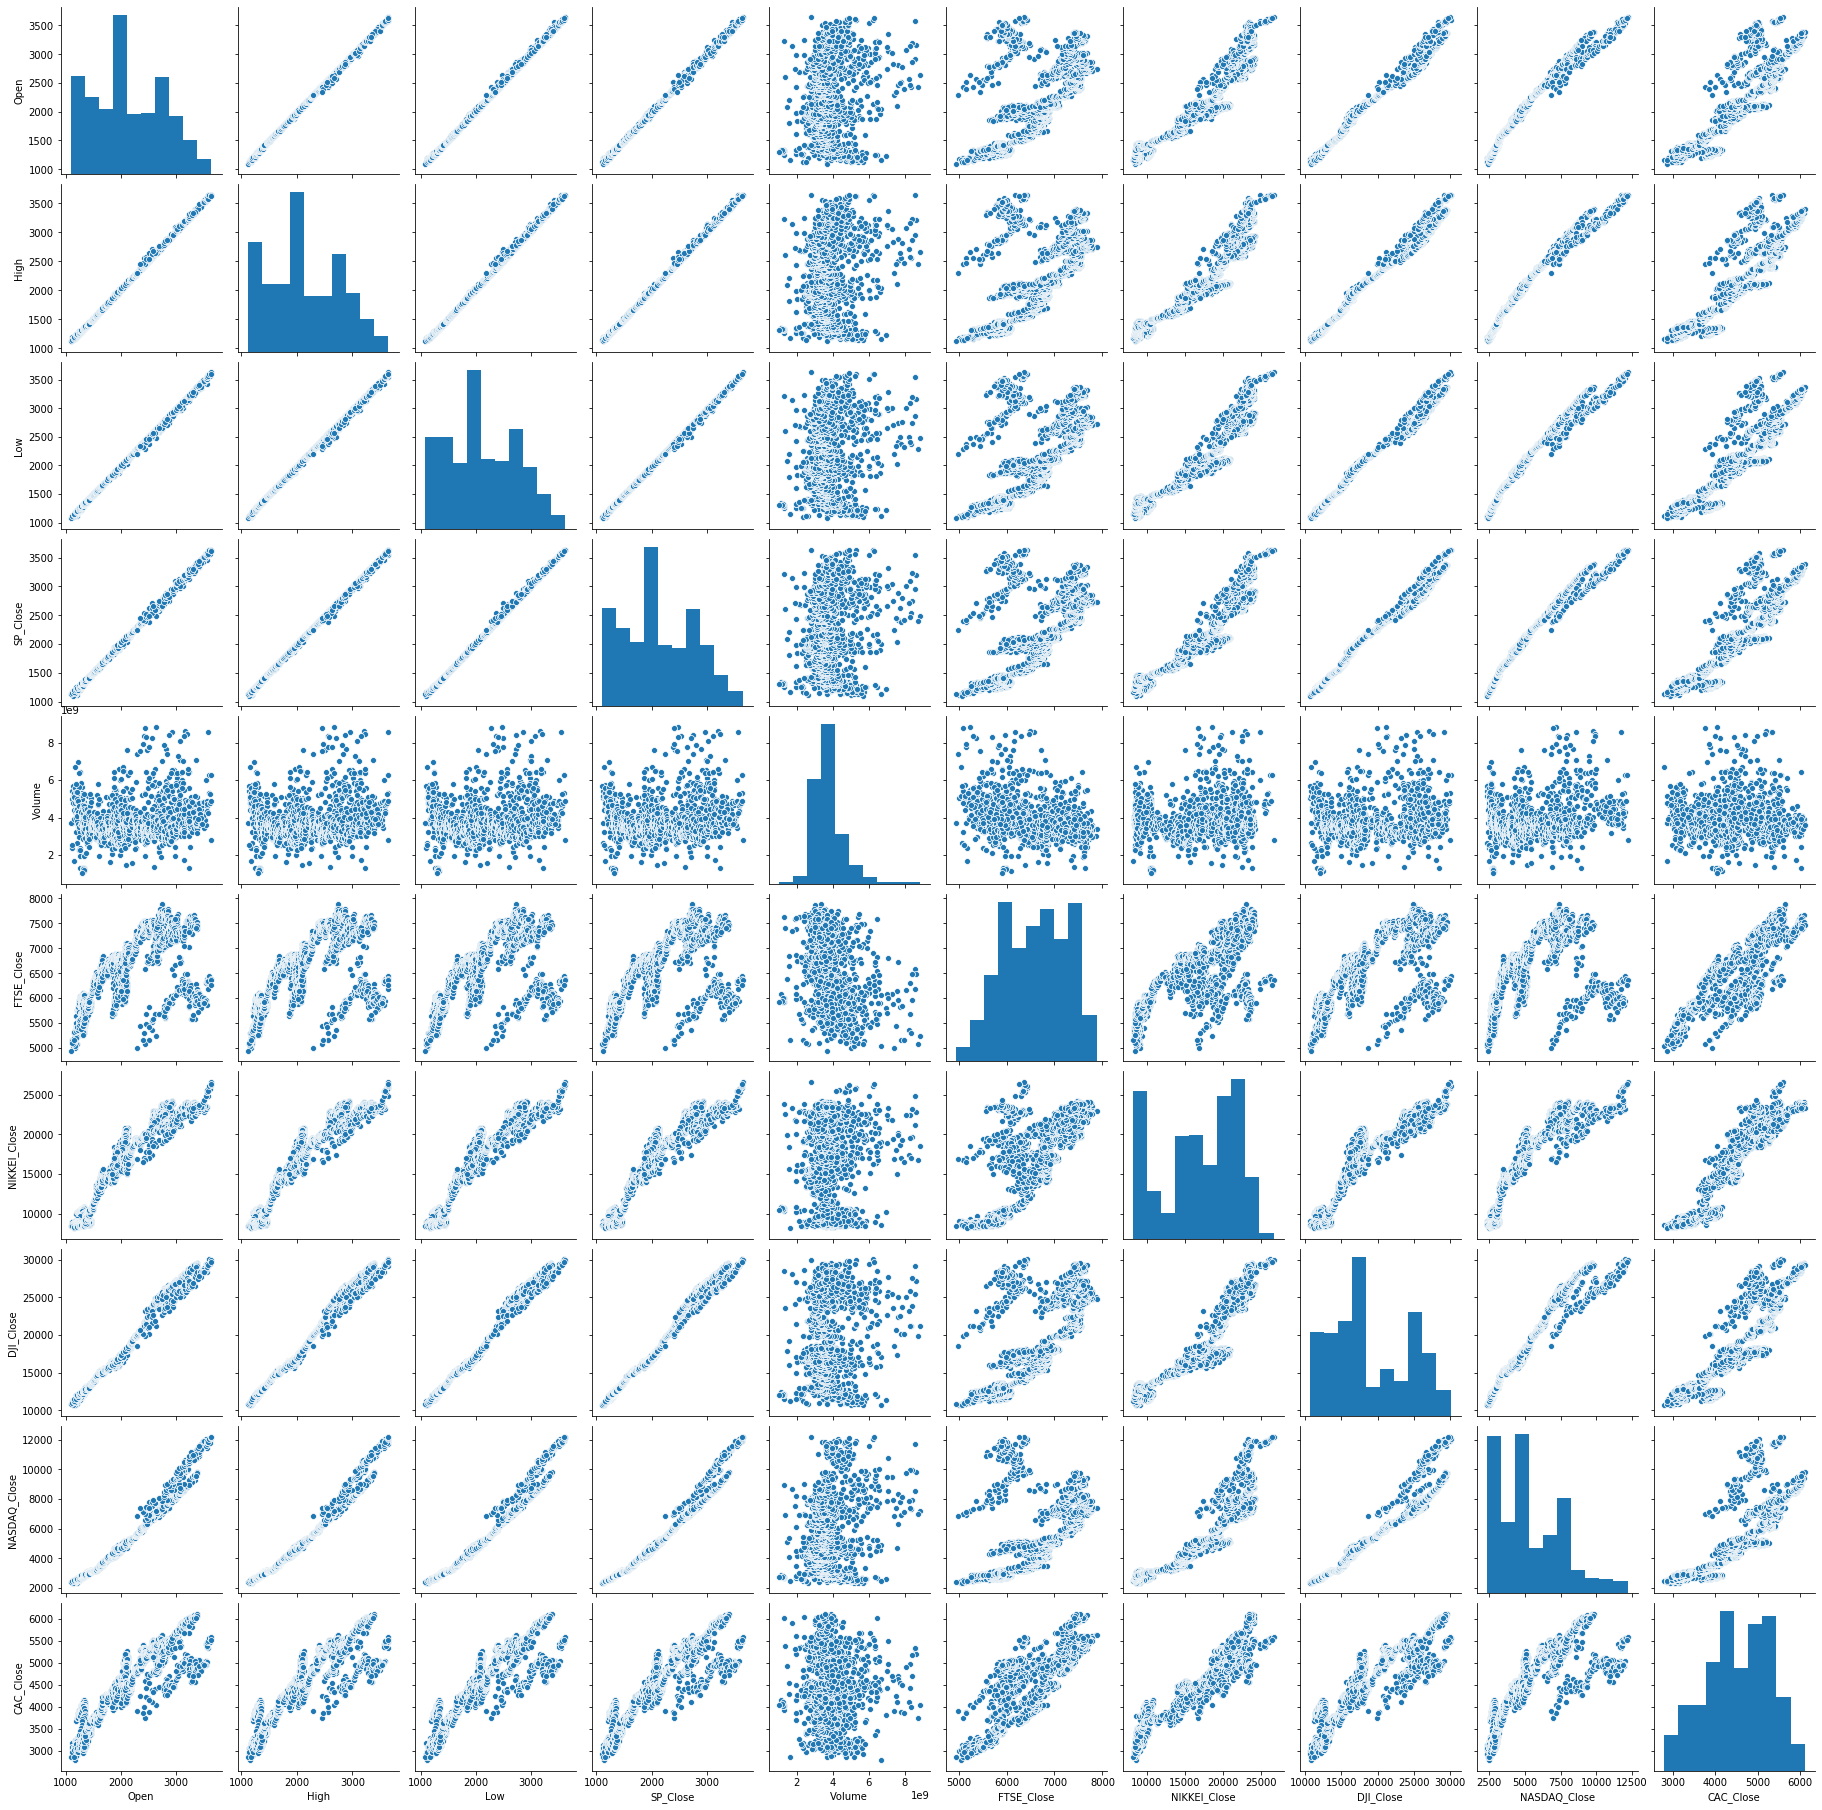

In [29]:
sns.pairplot(Data)

In [37]:
data = Data['SP_Close']

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

# Shapiro-Wilk Test
if p > alpha:
	print('Acc to Shapiro test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Shapiro test Sample does not look Gaussian (reject H0)')

# Kolmogorov Smirnov test
stat, p = kstest(data,'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Kolmogorov-Smirnov test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)')
    
# chisquare   
stat, p = chisquare(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to chisquare test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to chisquare test Sample does not look Gaussian (reject H0)')
    
# Normal Test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Normal test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Normal test Sample does not look Gaussian (reject H0)')

Statistics=0.960, p=0.000
Acc to Shapiro test Sample does not look Gaussian (reject H0)
Statistics=1.000, p=0.000
Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)
Statistics=420106.783, p=0.000
Acc to chisquare test Sample does not look Gaussian (reject H0)
Statistics=382.772, p=0.000
Acc to Normal test Sample does not look Gaussian (reject H0)


In [42]:
#Function to create label 3
def target_label(x):
    if x>0.0015:
        return 1
    else:
        return -1

In [43]:
def MOM(Close, n):  
    M = pd.Series(Close.diff(n), name = 'Momentum_' + str(n))    
    return M

In [44]:
DataTemp = Data.copy(deep=True)

In [45]:
DataTemp["MOM_3"] = MOM(DataTemp["SP_Close"],3)
DataTemp["MOM_5"] = MOM(DataTemp["SP_Close"],5)

# why these are added to dataset - technical indicator momentum

In [46]:
def ROC(close, n):  
    M = close.diff(n - 1)  
    N = close.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC
# rate of change

In [47]:
DataTemp["ROC_3"] = ROC(DataTemp["SP_Close"],3)
DataTemp["ROC_5"] = ROC(DataTemp["SP_Close"],5)
DataTemp["ROC_7"] = ROC(DataTemp["SP_Close"],7)

In [48]:
def MA(Close,n):

    MA = pd.Series(Close,name='MA_'+str(n))
    MA = MA.rolling(n).mean()
    return MA

In [49]:
DataTemp["MA_10"] = MA(DataTemp["SP_Close"],10)
DataTemp["MA_5"] = MA(DataTemp["SP_Close"],5)

In [50]:
def STDDEV(Close, n):  
    t = pd.Series(Close,name = 'STD_' + str(n))
    stddev = t.rolling(n).std() 
    return stddev

In [51]:
DataTemp["STDDEV_10"] = STDDEV(DataTemp["SP_Close"],10)
DataTemp["STDDEV_21"] = STDDEV(DataTemp["SP_Close"],21)
DataTemp["STDDEV_31"] = STDDEV(DataTemp["SP_Close"],31)

# why these features are added

In [52]:
def ForceIndex(close, volume, n): 
    FI = pd.Series(close.diff(n) * volume, name = 'ForceIndex')  
    return FI

In [53]:
DataTemp["FI"] = ForceIndex(DataTemp["SP_Close"],DataTemp["Volume"],10)

In [54]:
DataTemp["Target1"] = np.sign(DataTemp["SP_Close"].diff()).shift(-1)
DataTemp["Target2"] = np.sign(DataTemp["Open"].diff()).shift(-1)
DataTemp["Target3"] = DataTemp["SP_Close"].pct_change().apply(target_label).shift(-1)
DataTemp.loc[DataTemp.Target2==0, 'Target2'] = 1

# why these transformations are made - differences are made as +1, -1 --- these are predicted finally

In [55]:
DataTemp["Open_Change"] = DataTemp["Open"].pct_change()
DataTemp["High_Change"] = DataTemp["High"].pct_change()
DataTemp["Volume_Change"] = DataTemp["Volume"].pct_change()
DataTemp["Low_Change"] = DataTemp["Low"].pct_change()

# what is pct_change() method

In [56]:
# renaming the columns , adding returns , removing features that are not potent
ReturnsList = [i for i in DataTemp.columns if any(['_Close' in i,'_Price' in i])]
for i in ReturnsList:
    DataTemp[i.split("_")[0]+"_Returns"] = DataTemp[i].pct_change()
Drop = [i for i in DataTemp.columns if any(["_Price" in i,"_Close" in i])]
DataTemp.drop(Drop,axis=1,inplace=True)

In [57]:
#dropped null values
DataTemp.dropna(inplace=True)
ColsList = list(DataTemp.columns)
ColsList.pop(ColsList.index("Target1"))
ColsList.pop(ColsList.index("Target2"))
ColsList.pop(ColsList.index("Target3"))
DataTemp = DataTemp[ColsList+["Target1"]+["Target2"]+["Target3"]]

In [58]:
DataTemp.dropna(inplace=True)

In [59]:
DataTemp

Open         High          Low      Volume      MOM_3  \
Date                                                                       
2011-01-24  1283.290039  1291.930054  1282.469971  3902470000   8.919922   
2011-01-25  1288.170044  1291.260010  1281.069946  4595380000  10.920044   
2011-01-26  1291.969971  1299.739990  1291.969971  4730980000  13.280029   
2011-01-27  1297.510010  1301.290039  1294.410034  4309190000   8.700073   
2011-01-28  1299.630005  1302.670044  1275.099976  5618630000 -14.840088   
...                 ...          ...          ...         ...        ...   
2020-11-19  3559.409912  3585.219971  3543.840088  4347200000 -45.039795   
2020-11-20  3579.310059  3581.229980  3556.850098  4218970000 -51.989990   
2020-11-24  3594.520020  3642.310059  3594.520020  6267570000  67.619873   
2020-11-25  3635.500000  3635.500000  3617.760010  4902560000  47.779785   
2020-11-27  3638.550049  3644.310059  3629.330078  2778450000  80.810059   

                MOM_5     ROC_3     ROC_5     ROC_7        MA_10  ...  \
Date                                                              ...   
2011-01-24  -2.400024  0.826391 -0.322779  0.551502  1284.032996  ...   
2011-01-25  -3.839966  0.610128  0.722355 -0.159285  1286.001001  ...   
2011-01-26  14.709961  0.448548  1.278646  0.124321  1288.216003  ...   
2011-01-27  19.280029  0.647469  1.261547  1.374500  1289.574011  ...   
2011-01-28  -7.010010 -1.564829 -1.123300 -0.306191  1288.832007  ...   
...               ...       ...       ...       ...          ...  ...   
2020-11-19  44.860107 -0.766302 -0.091483  0.257797  3568.638989  ...   
2020-11-20 -27.609863 -0.287293 -1.912644  0.580435  3573.448999  ...   
2020-11-24   8.500000  1.494744  0.716988  1.401894  3581.939990  ...   
2020-11-25  20.119873  2.026959  1.733843  0.075546  3590.351978  ...   
2020-11-27  70.560059  0.080876  1.576829  0.798444  3596.920996  ...   

            Low_Change  SP_Returns  FTSE_Returns  NIKKEI_Returns  DJI_Returns  \
Date                                                                            
2011-01-24    0.000312    0.005836      0.008073        0.006870     0.009154   
2011-01-25   -0.001092    0.000263     -0.004408        0.011533    -0.000278   
2011-01-26    0.008509    0.004221      0.008703       -0.005974     0.000689   
2011-01-27    0.001889    0.002244     -0.000687        0.007379     0.000366   
2011-01-28   -0.014918   -0.017853     -0.014032       -0.011292    -0.013856   
...                ...         ...           ...             ...          ...   
2020-11-19   -0.006585    0.003946     -0.007956       -0.003646     0.001522   
2020-11-20    0.003671   -0.006793      0.002700       -0.004173    -0.007453   
2020-11-24    0.010591    0.021889      0.012706        0.025001     0.026749   
2020-11-25    0.006465   -0.001584     -0.006390        0.005017    -0.005783   
2020-11-27    0.003198    0.002397     -0.003677        0.013228     0.001269   

            NASDAQ_Returns  CAC_Returns  Target1  Target2  Target3  
Date                                                                
2011-01-24        0.010414     0.003923      1.0      1.0     -1.0  
2011-01-25        0.000626    -0.003369      1.0      1.0      1.0  
2011-01-26        0.007447     0.007327      1.0      1.0      1.0  
2011-01-27        0.005760     0.002593     -1.0      1.0     -1.0  
2011-01-28       -0.024821    -0.014102      1.0     -1.0      1.0  
...                    ...          ...      ...      ...      ...  
2020-11-19        0.008737    -0.006675     -1.0      1.0     -1.0  
2020-11-20       -0.004178     0.003878      1.0      1.0      1.0  
2020-11-24        0.015337     0.011378     -1.0      1.0     -1.0  
2020-11-25        0.004786     0.002315      1.0      1.0      1.0  
2020-11-27        0.009215     0.004827     -1.0     -1.0     -1.0  

[2286 rows x 28 columns]

In [60]:
DataTemp.describe()

Open         High          Low        Volume        MOM_3  \
count  2286.000000  2286.000000  2286.000000  2.286000e+03  2286.000000   
mean   2160.344530  2171.367383  2148.440990  3.763524e+09     3.087437   
std     619.540854   622.386199   616.274418  8.720168e+08    42.994747   
min    1097.420044  1125.119995  1074.770020  1.025000e+09  -383.560059   
25%    1651.672485  1658.937531  1643.425018  3.258320e+09   -11.960052   
50%    2086.909912  2095.325073  2077.555054  3.604850e+09     5.394958   
75%    2702.402466  2723.839966  2682.617432  4.056868e+09    21.959961   
max    3638.550049  3645.989990  3629.330078  8.829380e+09   392.670166   

             MOM_5        ROC_3        ROC_5        ROC_7        MA_10  ...  \
count  2286.000000  2286.000000  2286.000000  2286.000000  2286.000000  ...   
mean      5.078316     0.102104     0.202967     0.301637  2156.175150  ...   
std      54.818553     1.470093     2.075573     2.468598   616.442876  ...   
min    -543.300049   -13.933312   -17.212370   -20.749371  1144.295007  ...   
25%     -13.737488    -0.488384    -0.660804    -0.697581  1647.677490  ...   
50%       8.554932     0.182460     0.376070     0.493546  2083.025995  ...   
75%      28.860046     0.843132     1.270431     1.610358  2701.244000  ...   
max     389.250000    10.644506    13.590332    15.517574  3596.920996  ...   

        Low_Change   SP_Returns  FTSE_Returns  NIKKEI_Returns  DJI_Returns  \
count  2286.000000  2286.000000   2286.000000     2286.000000  2286.000000   
mean      0.000506     0.000522      0.000092        0.000512     0.000471   
std       0.010076     0.011494      0.010759        0.013775     0.011539   
min      -0.084352    -0.119841     -0.108738       -0.105539    -0.129265   
25%      -0.003428    -0.003445     -0.005015       -0.006171    -0.003597   
50%       0.001045     0.000700      0.000491        0.000707     0.000728   
75%       0.005356     0.005596      0.005640        0.007785     0.005495   
max       0.069612     0.093828      0.090530        0.080381     0.113650   

       NASDAQ_Returns  CAC_Returns      Target1      Target2      Target3  
count     2286.000000  2286.000000  2286.000000  2286.000000  2286.000000  
mean         0.000744     0.000237     0.108486     0.135608    -0.088364  
std          0.012792     0.013483     0.994315     0.990979     0.996306  
min         -0.123213    -0.122768    -1.000000    -1.000000    -1.000000  
25%         -0.004284    -0.006008    -1.000000    -1.000000    -1.000000  
50%          0.001191     0.000670     1.000000     1.000000    -1.000000  
75%          0.006926     0.006620     1.000000     1.000000     1.000000  
max          0.093460     0.083895     1.000000     1.000000     1.000000  

[8 rows x 28 columns]

[Text(0.5, 0, 'Open'),
 Text(1.5, 0, 'High'),
 Text(2.5, 0, 'Low'),
 Text(3.5, 0, 'SP_Close'),
 Text(4.5, 0, 'Volume'),
 Text(5.5, 0, 'FTSE_Close'),
 Text(6.5, 0, 'NIKKEI_Close'),
 Text(7.5, 0, 'DJI_Close'),
 Text(8.5, 0, 'NASDAQ_Close'),
 Text(9.5, 0, 'CAC_Close')]

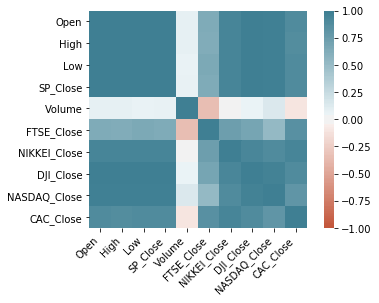

In [61]:
# Heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

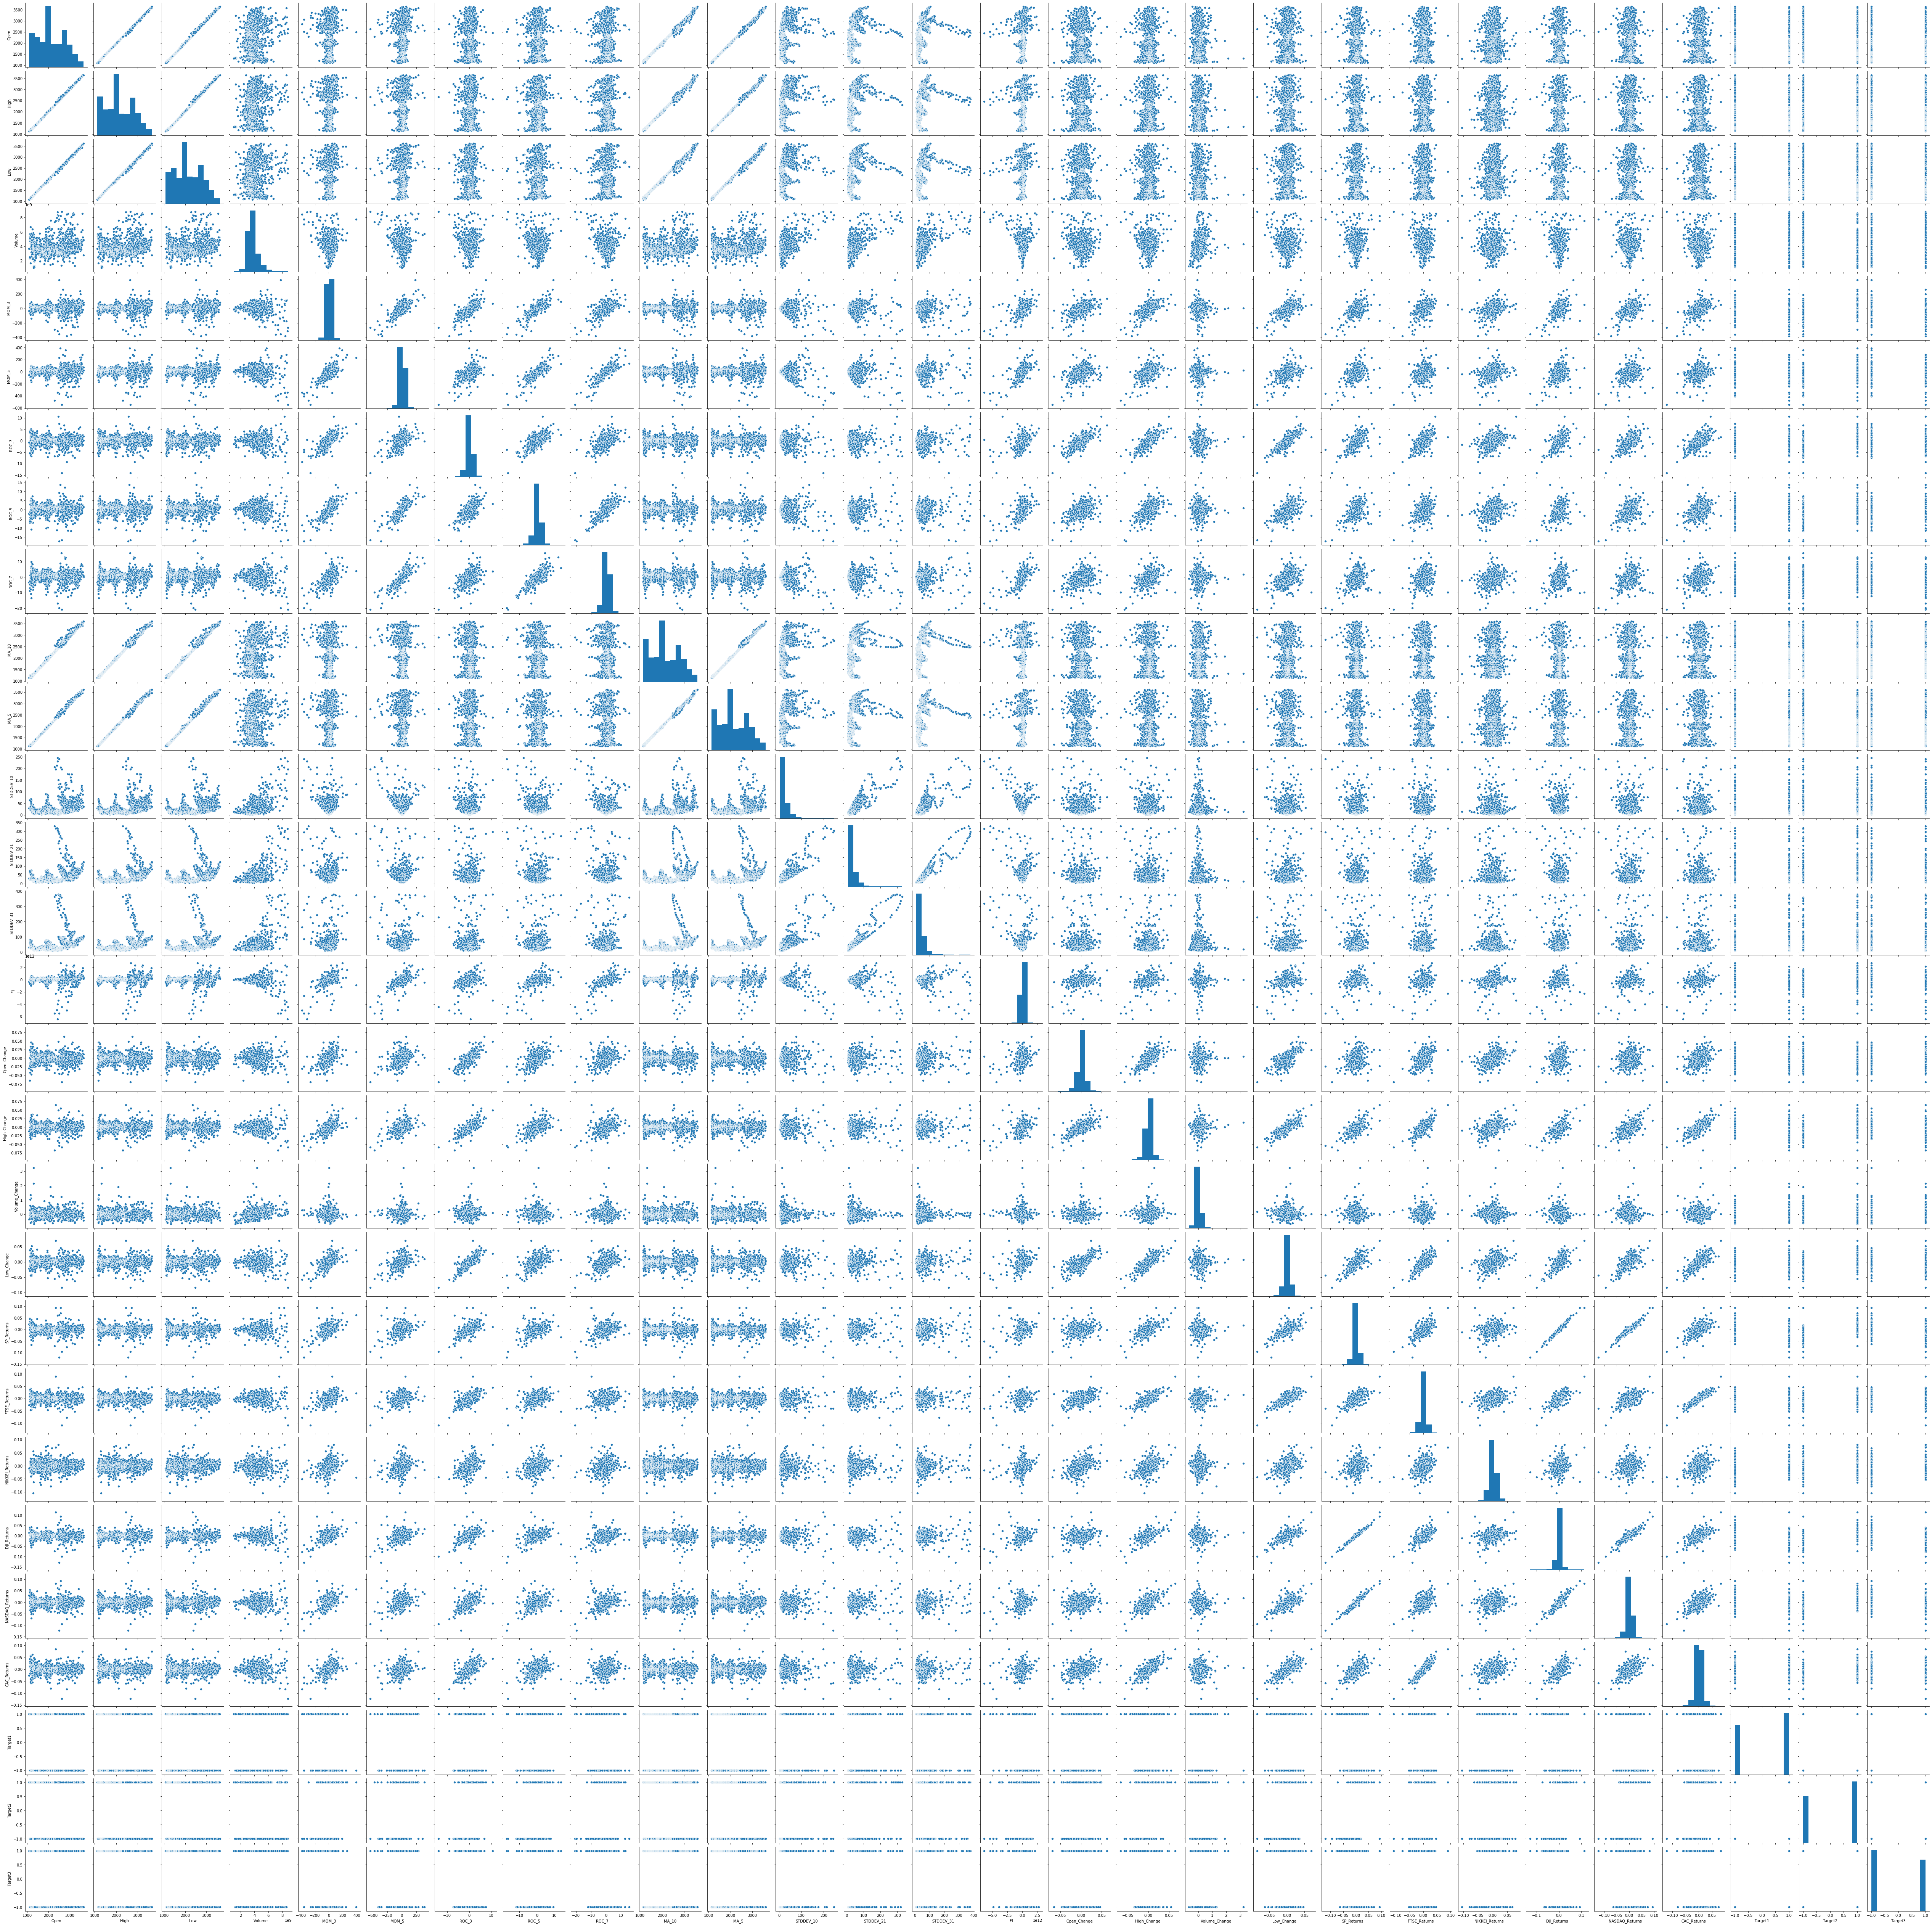

In [62]:
sns.pairplot(DataTemp)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score

In [34]:
parameters = {"n_estimators":[100,500,1000],"criterion":["entropy","gini"],"max_features":["sqrt","log2",10,20],
              "max_depth":[10,15,20,None],"min_samples_leaf":[1,5,10,15,20]}

In [35]:
RC = RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=123)

In [36]:
gscv = GridSearchCV(RC,parameters,scoring="roc_auc",n_jobs=-1,cv=10)
gscv.fit(DataTemp[DataTemp.columns[:-1]][0:250],DataTemp[DataTemp.columns[-1]][0:250])

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=123,
                                   

In [37]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 20,
 'min_samples_leaf': 5,
 'n_estimators': 100}

In [38]:
DataTemp.columns

Index(['Open', 'High', 'Low', 'Volume', 'MOM_3', 'MOM_5', 'ROC_3', 'ROC_5',
       'ROC_7', 'MA_10', 'MA_5', 'STDDEV_10', 'STDDEV_21', 'STDDEV_31', 'FI',
       'Open_Change', 'High_Change', 'Volume_Change', 'Low_Change',
       'SP_Returns', 'FTSE_Returns', 'NIKKEI_Returns', 'DJI_Returns',
       'NASDAQ_Returns', 'CAC_Returns', 'Target1', 'Target2', 'Target3'],
      dtype='object')

In [39]:
Features = DataTemp[DataTemp.columns[:-3]]
#Label or target data
Label1 = DataTemp[DataTemp.columns[-3]]
Label2 = DataTemp[DataTemp.columns[-2]]
Label3 = DataTemp[DataTemp.columns[-1]]
from sklearn.metrics import f1_score
#A function is created so that you pass the test set and it gives you the accuracy, f1 score and roc_auc_score by just predicting 
#all +1 on the test set.
def benchmark_stats(Test):
    #Calculating F1 score
    print ("F1 score for predicting all +1 on the test dataset: {:.4f}".format(
        f1_score(Test, [1]*len(Test), pos_label=1, average='binary')))

    #Calculating Accuracy score
    from sklearn.metrics import accuracy_score
    print ("Accuracy score for predicting all +1 on the test dataset: {:.4f}".format(
        accuracy_score(Test, [1]*len(Test))))
    
    #Calculating roc_auc score
    print("AUC score for predicting all +1 on the test dataset: {:.4f}".format(roc_auc_score(Test,[1]*len(Test))))
    
#We will be using the above function to compare the accuracy,f1 score and AUC score of our model

In [40]:
#Setting up some helper functions that may help to train, predict and evaluate our model.

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    clf.fit(X_train, y_train)
    print ("Model Trained!!!!")

def predict_labels_f1(clf, features, target):
    
    y_pred = clf.predict(features)
    return f1_score(target, y_pred, pos_label=1)

def predict_labels_accuracy(clf, features, target):
    
    y_pred = clf.predict(features)
    return accuracy_score(target, y_pred)   

def predict_labels_auc(clf,features,target):
    
    y_pred = clf.predict(features)
    return roc_auc_score(target,y_pred)

def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer'''
    
    #Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    #Train the classifier
    train_classifier(clf, X_train, y_train)
    
    #Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels_f1(clf, X_train, y_train)))
    print ("Accuracy score for training set: {:.4f}.".format(predict_labels_accuracy(clf, X_train, y_train)))
    print("AUC score for training set: {:.4f}.".format(predict_labels_auc(clf,X_train,y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels_f1(clf, X_test, y_test)))
    print ("Accuracy score for test set: {:.4f}.".format(predict_labels_accuracy(clf, X_test, y_test)))
    print("AUC score for the test set: {:.4f}.".format(predict_labels_auc(clf,X_test,y_test)))

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression

DT = DecisionTreeClassifier(random_state=42)
GNB = GaussianNB()
svc = SVC(random_state=42)
RF = RandomForestClassifier(n_estimators=3000,criterion="gini",max_depth=25,max_features="log2",min_samples_leaf=5,random_state=42)
Logistic = LogisticRegression()

In [42]:
for clf in [DT, GNB, svc,RF,Logistic]:
    print ("\n{}: \n".format(clf.__class__.__name__))
    for i in range(0,3525,100):
        if(len(Features[i+1000:i+1100]==100)):
            train_predict(clf, Features[i:i+1000], Label1[i:i+1000], Features[i+1000:i+1100], Label1[i+1000:i+1100])
            print('#'*40)
            print("BENCHMARK STATS - NAIVE CLASSIFIER")
            benchmark_stats(Label1[i+1000:i+1100])
            print('#'*40)
            print('-'*50)
        else:
            break


DecisionTreeClassifier: 

Training a DecisionTreeClassifier using a training set size of 1000. . .
Model Trained!!!!
F1 score for training set: 1.0000.
Accuracy score for training set: 1.0000.
AUC score for training set: 1.0000.
F1 score for test set: 0.5405.
Accuracy score for test set: 0.4900.
AUC score for the test set: 0.4900.
########################################
BENCHMARK STATS - NAIVE CLASSIFIER
F1 score for predicting all +1 on the test dataset: 0.6667
Accuracy score for predicting all +1 on the test dataset: 0.5000
AUC score for predicting all +1 on the test dataset: 0.5000
########################################
--------------------------------------------------
Training a DecisionTreeClassifier using a training set size of 1000. . .
Model Trained!!!!
F1 score for training set: 1.0000.
Accuracy score for training set: 1.0000.
AUC score for training set: 1.0000.
F1 score for test set: 0.5143.
Accuracy score for test set: 0.4900.
AUC score for the test set: 0.4928.
#######

In [64]:
# we need to plot the ROC curve 
# Basic dataset - anychance we can plot to say where the data is spread 
# What transfromation technique used to balance the dataset
################professor asked above questions in presentation
# Literature survey based on the document 
# what SP500 does, what imapacts the SP500 - which ventures impact our stock prediction SP500
# data source 
# problem statement 
# technical indicators used in our model for statistical analysis
# rough data plot
#how we made transformations with graphs 
# which model is good for given problem
# conclude

# future work 
